<a href="https://colab.research.google.com/github/vahabbayat/Estimate-House-Price-by-Mulitple-Linear-Regression/blob/main/Estimate_House_Price_by_Mulitple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-04-18 10:22:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2022-04-18 10:22:53 (1.10 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [9]:
df = pd.read_csv('/content/Tehran house data.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [10]:
cdf=[]

for i in range (len(df)):
    if ',' in df.Area.iloc[i]:
        cdf.append(i)

In [11]:
df = df.drop(cdf)
df.Area = df.Area.astype('int')
list_Address = df.Address.unique()
le = LabelEncoder()
le.fit(list_Address)
df.Address = le.transform(df.Address)
le.get_params()

{}

In [12]:
for i in [df.Parking, df.Warehouse, df.Elevator]:
    for j in range (len(df)):
        if i.iloc[j] == True:
            i.iloc[j] = 1
        elif i.iloc[j] == False:
            i.iloc[j] = 0
        else:
            print (i, j)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
df = df.astype('int')

In [14]:
df.Address.isna() == True
df.dropna(inplace = True)
df[df['Address'].isna()]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)


In [15]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1850000000,61666
1,60,1,1,1,1,156,1850000000,61666
2,79,2,1,1,1,117,550000000,18333
3,95,2,1,1,1,152,902500000,30083
4,123,2,1,1,1,150,7000000000,233333
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,163,3500000000,116666
3475,83,2,1,1,1,105,6800000000,226666
3476,75,2,0,0,0,115,365000000,12166
3477,105,2,1,1,1,39,5600000000,186666


In [21]:
cdf = df[['Area', 'Room', 'Address',"Price(USD)"]]
cdf.head()

,Area,Room,Address,Price(USD)
0,63,1,156,61666
1,60,1,156,61666
2,79,2,117,18333
3,95,2,152,30083
4,123,2,150,233333


In [40]:
df.rename(columns = {'Price(USD)':'Price_USD'}, inplace = True)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_USD
0,63,1,1,1,1,156,1850000000,61666
1,60,1,1,1,1,156,1850000000,61666
2,79,2,1,1,1,117,550000000,18333
3,95,2,1,1,1,152,902500000,30083
4,123,2,1,1,1,150,7000000000,233333


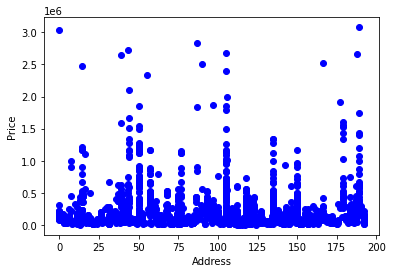

In [49]:
plt.scatter(df.Address, df.Price_USD,  color='blue')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()